In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import scipy


In [2]:
opti = pd.read_csv('Opti_Results.csv')
opti.head

df = opti[['day','alpha']] 
df = df.iloc[9:375]
df.shape

(366, 2)

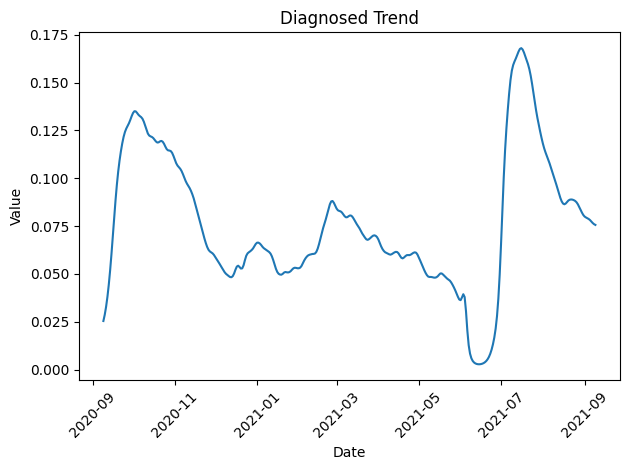

In [3]:
df['day'] = pd.to_datetime(df['day'])
df.set_index('day', inplace=True)

plt.plot(df.index, df.iloc[:, 0])  # Assuming you want to plot the second column (first non-index column)
plt.xlabel('Date')
plt.ylabel('Value') 
plt.title('Diagnosed Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


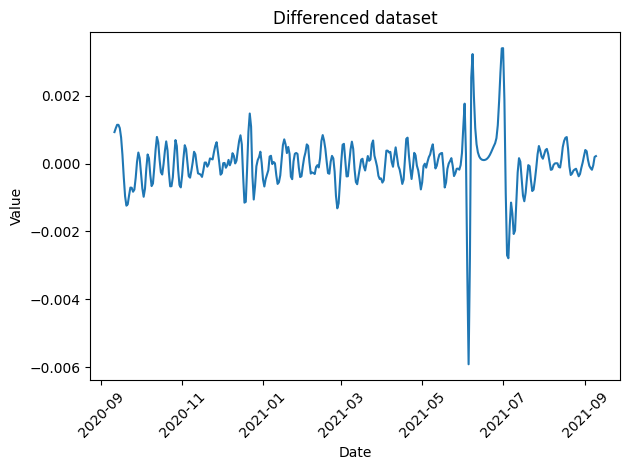

ADF Statistic: -4.832138107540328
Critical Values: {'1%': -3.449226932880019, '5%': -2.869857365438656, '10%': -2.571201085130664}


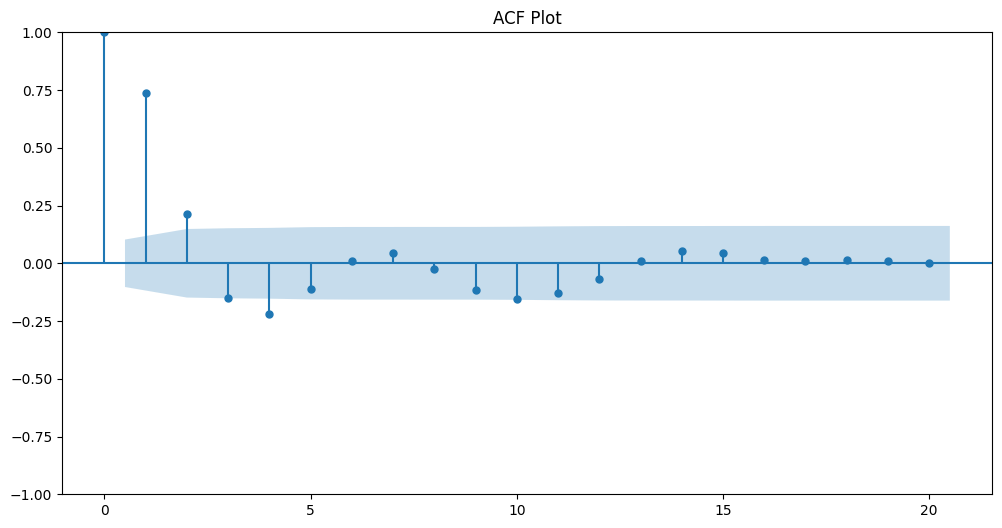

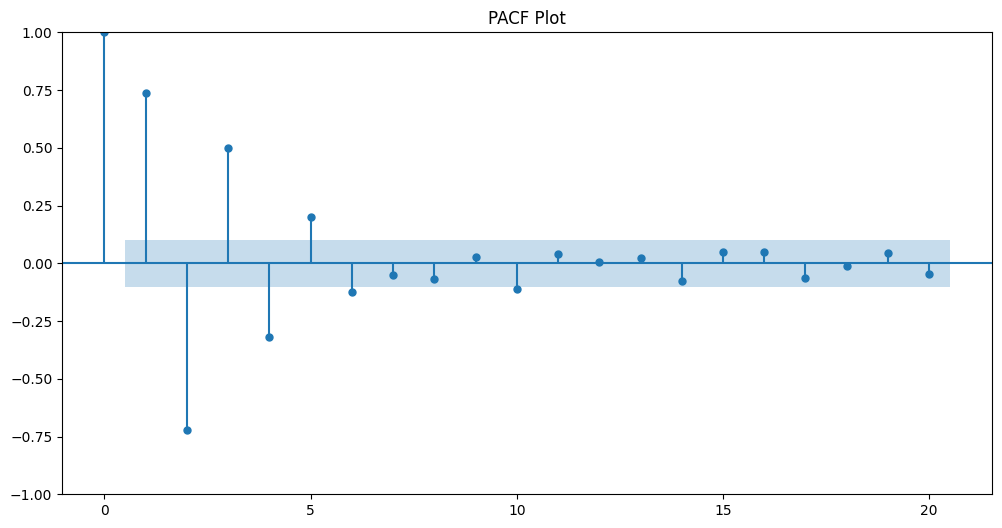

In [4]:
# Since the dataset is strongly not stationary, 2nd order differencing is performed to make it stationary
df_diff = df.diff().dropna()
df_diff2 = df_diff.diff().dropna()

# Plotting the result
plt.plot(df_diff2.index, df_diff2['alpha'])  
plt.xlabel('Date')
plt.ylabel('Value') 
plt.title('Differenced dataset')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

# Check for stationarity using Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0]) 
    print('Critical Values:', result[4])

adf_test(df_diff2)

# ACF and PACF plots for determining ARIMA orders
plt.figure(figsize=(12, 6))
plot_acf(df_diff2, lags=20, ax=plt.gca())
plt.title('ACF Plot')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_diff2, lags=20, ax=plt.gca())
plt.title('PACF Plot')
plt.show()


In [5]:
stepwise_fit = auto_arima(df_diff2, trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-4918.714, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-4175.426, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4460.078, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-4173.410, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4177.366, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-4869.458, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-4882.132, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-4921.884, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-4876.289, Time=0.28 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-4919.578, Time=0.20 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-4908.437, Time=0.47 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-4918.805, Time=0.29 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-4452.153, Time=0.32 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-4915.023, Time=0.33 sec
 ARIMA(3,0,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  364
Model:               SARIMAX(3, 0, 2)   Log Likelihood                2467.794
Date:                Mon, 22 Jan 2024   AIC                          -4923.589
Time:                        17:54:37   BIC                          -4900.206
Sample:                    09-11-2020   HQIC                         -4914.295
                         - 09-09-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5809      0.006    247.499      0.000       1.568       1.593
ar.L2         -1.1724      0.019    -60.354      0.000      -1.210      -1.134
ar.L3          0.3742      0.016     23.569      0.000       0.343       0.405
ma.L1          0.3640      0.027     13.445      0.000       0.311       0.417
ma.L2         -0.4277      0.023    -18.662      0.000      -0.473      -0.383
sigma2      7.363e-08   2.61e-09     28.238      0.000    6.85e-08    7.87e-08
===================================================================================
Ljung-Box (L1) (Q):                   1.75   Jarque-Bera (JB):              9939.03
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               4.90   Skew:                             1.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.44e+16. Standard errors may be unstable.
"""

291
73


/Users/marcodelloro/Desktop/Thesis/MSc-Thesis-TUe/Forecasting/myVenv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/marcodelloro/Desktop/Thesis/MSc-Thesis-TUe/Forecasting/myVenv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/marcodelloro/Desktop/Thesis/MSc-Thesis-TUe/Forecasting/myVenv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/marcodelloro/Desktop/Thesis/MSc-Thesis-TUe/Forecasting/myVenv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  war

73


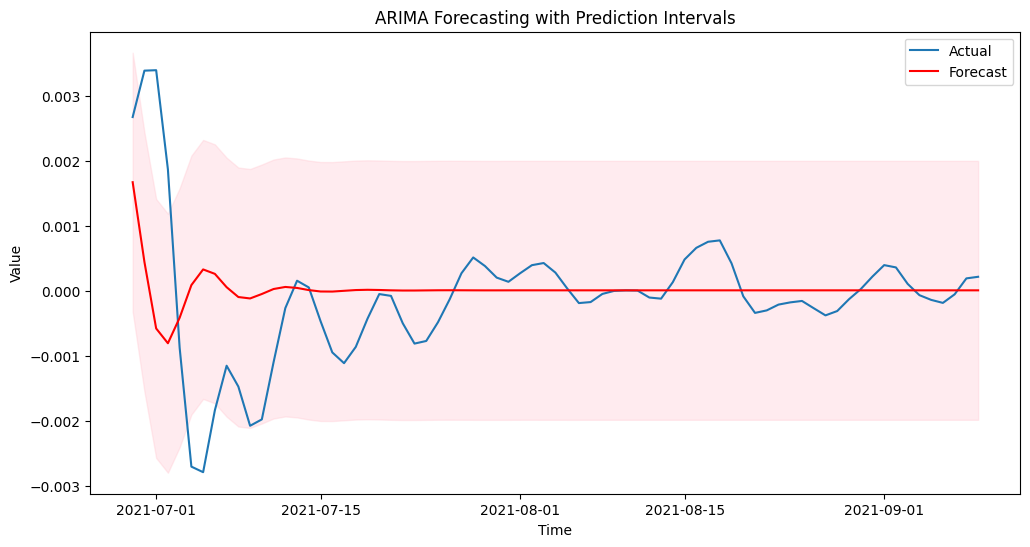

In [15]:
# Split the data into training and testing sets
train_size = int(0.8 * len(df_diff2))
train = df_diff2['alpha'][:train_size]
test = df_diff2['alpha'][train_size:]

print(len(train))
print(len(test))

model = ARIMA(train, order=(3, 0, 2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

print(len(forecast))

residuals = test - forecast
prediction_interval = 1.96 * np.std(residuals)  # This is a single value

# Create upper and lower bounds for the forecast
lower_bound = forecast - prediction_interval
upper_bound = forecast + prediction_interval

# Plot the forecasts and the actual values with prediction intervals
plt.figure(figsize=(12, 6))
plt.plot(df_diff2.index[train_size:], test, label='Actual')
plt.plot(df_diff2.index[train_size:], forecast, label='Forecast', color='red')
plt.fill_between(df_diff2.index[train_size:], forecast - prediction_interval, forecast + prediction_interval, color='pink', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecasting with Prediction Intervals')
plt.legend()
plt.show()

/Users/marcodelloro/Desktop/Thesis/MSc-Thesis-TUe/Forecasting/myVenv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


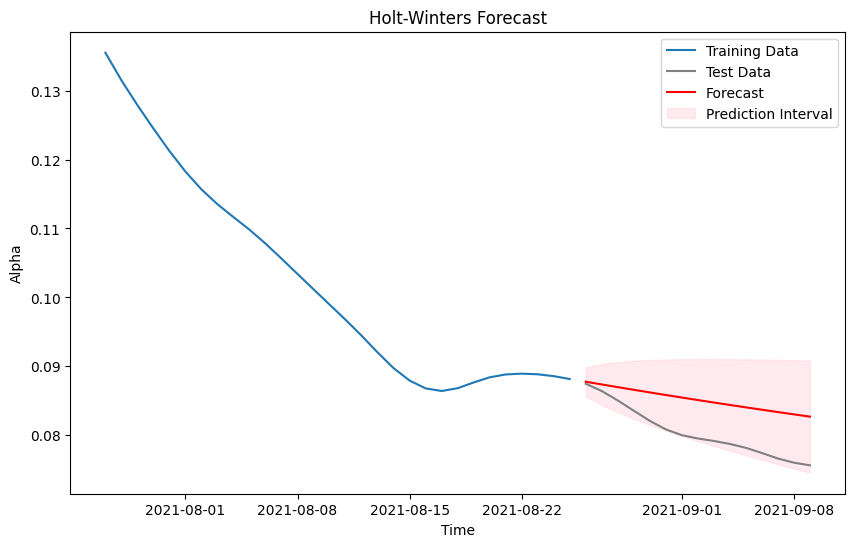

In [9]:
# Split the data into training and testing sets

split_index = len(df) - 15
train_holt = df['alpha'][split_index-30:split_index]
test_holt = df['alpha'][split_index:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing

hwmodel_damped = ExponentialSmoothing(train_holt, trend='mul', damped_trend=True, seasonal=None).fit()
test_pred=hwmodel_damped.forecast(15)

residuals = test_holt - test_pred
std_residuals = np.std(residuals)
time_steps = np.arange(1, 15 + 1)

# Calculate upper and lower bounds
upper_bound_hw = test_pred + (std_residuals * np.sqrt(time_steps))
lower_bound_hw = test_pred - (std_residuals * np.sqrt(time_steps))


plt.figure(figsize=(10, 6))
plt.plot(train_holt.index, train_holt, label='Training Data')
plt.plot(test_holt.index, test_holt, label='Test Data', color='gray')
plt.plot(test_holt.index, test_pred, label='Forecast', color='red')
plt.fill_between(test_holt.index, lower_bound_hw, upper_bound_hw, color='pink', alpha=0.3, label='Prediction Interval')
plt.xlabel('Time')
plt.ylabel('Alpha')
plt.title('Holt-Winters Forecast')
plt.legend()
plt.show()